In [1]:
import os, sys
# Reference: https://stackoverflow.com/questions/34478398/import-local-function-from-a-module-housed-in-another-directory-with-relative-im
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from data.faces.faces_data import get_faces_dataset
import common_grid_search_analysis
import Boosting.common_boosting as common_boosting
import TrainingCurves

import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree

In [2]:
GS_FILE_NAME_PREFIX = "Analysis_Data/FACES_BOOSTING"

PLOT_SAVE_LOCATION = "Figures/"
ALGO = "Boosting"
DATASET = "Faces"
GLOBAL_FIG_COUNTER = 0

default_title = "{} Default Learning Curve\n Data Set: {}".format(ALGO, DATASET)
dt_title = "{} Base Estimator From Decision Tree Analysis Learning Curve\n Data Set: {}".format(ALGO, DATASET)
final_title = "{} Final Tuning Learning Curve\n Data Set: {}".format(ALGO, DATASET)

ylim=(0.5, 1.05)

# From Decision Trees
max_features = 11
default_base_estimator = tree.DecisionTreeClassifier(max_depth=1, max_features=11)

In [3]:
# Load Data
X_train, X_test, y_train, y_test = get_faces_dataset()
num_features = X_train.shape[1]

In [4]:
# Start with Learning Curve on Default Classifier
default_train_sizes, default_train_scores, default_test_scores, default_fit_times, default_score_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(default_base_estimator), X_train, y_train, "accuracy")

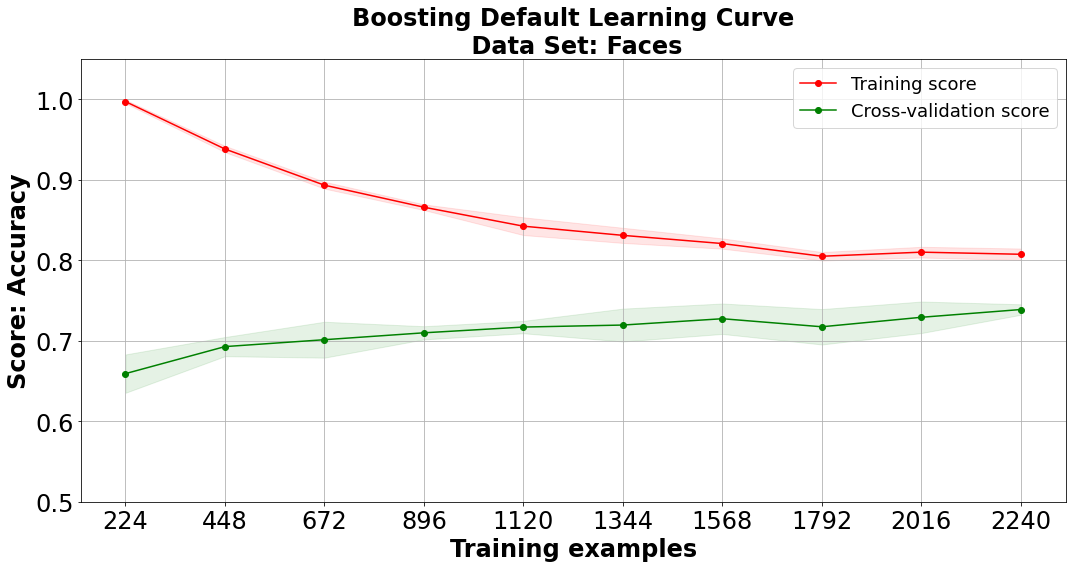

In [5]:
ylim=(0.5, 1.05)
TrainingCurves.plot_learning_curve(default_train_scores, default_test_scores, default_train_sizes, default_title, ylim=ylim)

In [6]:
DT_final_params = {'ccp_alpha': 0.004, 'max_depth': 3, 'criterion': 'gini', 'max_features':19}
# Start with DT From DT Analysis for base estimator
dt_train_sizes, dt_train_scores, dt_test_scores, dt_fit_times, dt_score_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(**DT_final_params)), X_train, y_train, "accuracy")

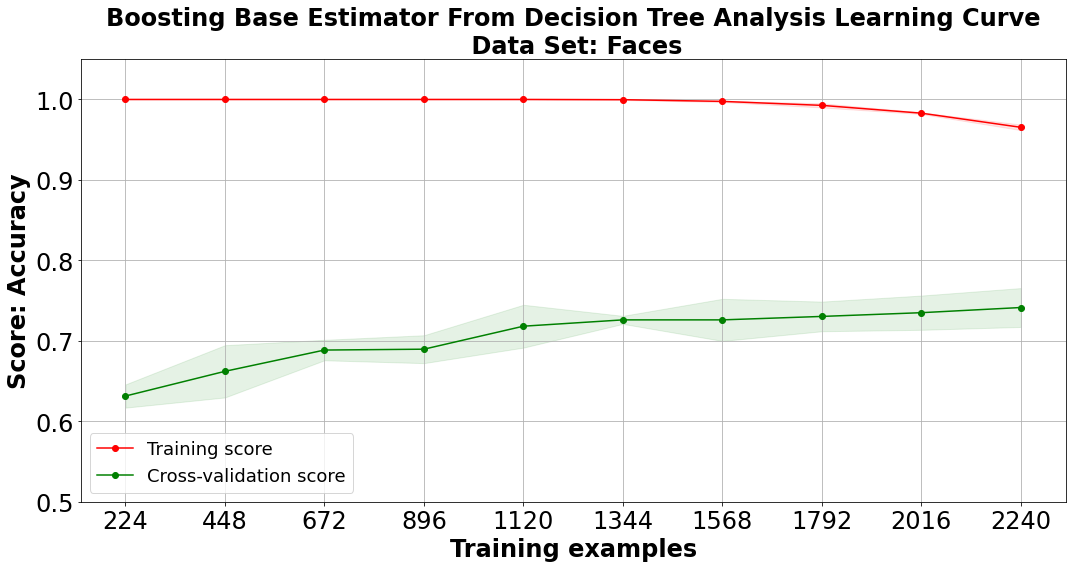

In [7]:
TrainingCurves.plot_learning_curve(dt_train_scores, dt_test_scores, dt_train_sizes, dt_title, ylim=ylim)

In [8]:
n_estimators = [i for i in range(1, 50)]
learning_rate = [i for i in np.arange(0.02, .8, 0.01)]
ccp_alpha = np.arange(0.0, 0.1, 0.001)
max_depth = [i for i in range(1, 25, 1)]

post_pruning_classifiers = []
post_pruning_labels = []
for i in ccp_alpha:
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=1, max_features=max_features))
    post_pruning_labels.append(i)

max_depth_classifiers = []
max_depth_labels = []
for i in max_depth:
    max_depth_classifiers.append(tree.DecisionTreeClassifier(max_depth=i, max_features=max_features, ccp_alpha=0.002))
    max_depth_labels.append(i)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of 490 | elapsed:    2.4s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  91 out of 490 | elapsed:    4.4s remaining:   19.3s
[Parallel(n_jobs=-1)]: Done 141 out of 490 | elapsed:    6.4s remaining:   15.7s
[Parallel(n_jobs=-1)]: Done 191 out of 490 | elapsed:    8.3s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done 241 out of 490 | elapsed:   10.3s remaining:   10.6s
[Parallel(n_jobs=-1)]: Done 291 out of 490 | elapsed:   12.3s remaining:    8.4s
[Parallel(n_jobs=-1)]: Done 341 out of 490 | elapsed:   14.2s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done 391 out of 490 | elapsed:   16.2s remaining:    4.1s
[Parallel(n_jobs=-1)]: Done 441 out of 490 | elapsed:   18.1s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   20.5s finished


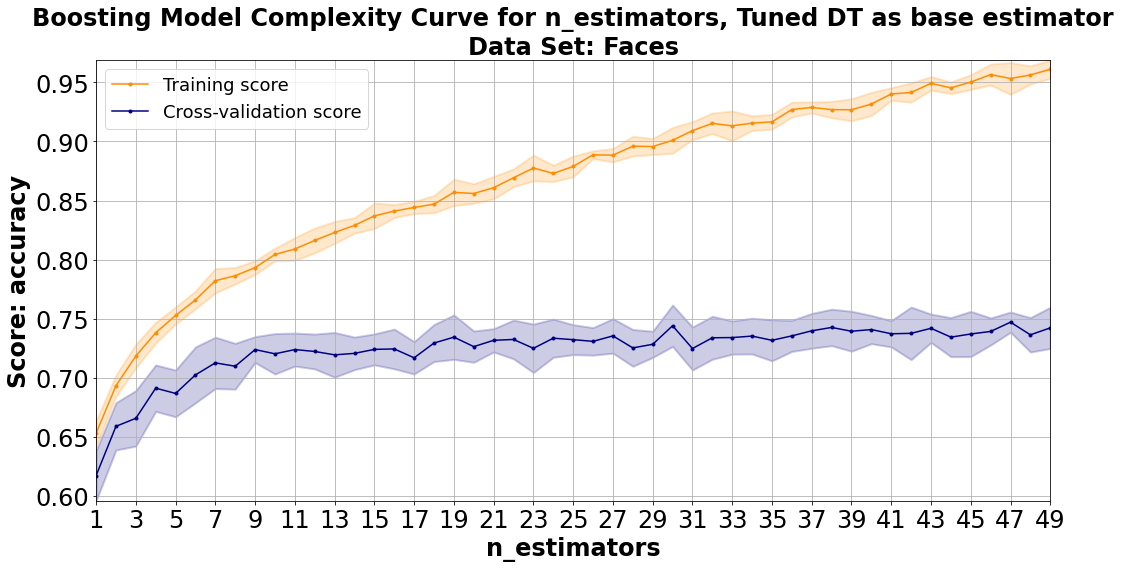

In [9]:
title = "{} Model Complexity Curve for n_estimators, Tuned DT as base estimator\nData Set: {}".format(ALGO, DATASET)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(**DT_final_params)), X_train, y_train, "n_estimators", n_estimators, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=-1, verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_estimators", n_estimators, title=title, scoring="accuracy", tick_spacing=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of 490 | elapsed:    1.4s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done  91 out of 490 | elapsed:    2.8s remaining:   12.4s
[Parallel(n_jobs=-1)]: Done 141 out of 490 | elapsed:    4.3s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done 191 out of 490 | elapsed:    5.8s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done 241 out of 490 | elapsed:    7.3s remaining:    7.6s
[Parallel(n_jobs=-1)]: Done 291 out of 490 | elapsed:    8.8s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 341 out of 490 | elapsed:   10.3s remaining:    4.5s
[Parallel(n_jobs=-1)]: Done 391 out of 490 | elapsed:   11.8s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 441 out of 490 | elapsed:   13.3s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   14.8s finished


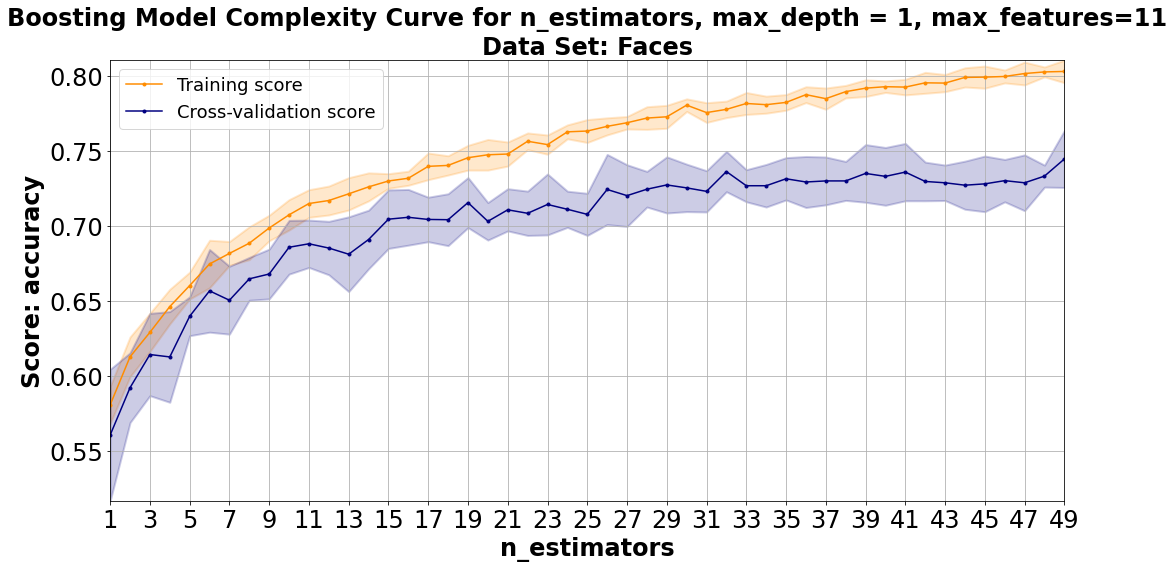

In [10]:
title = "{} Model Complexity Curve for n_estimators, max_depth = 1, max_features=11\nData Set: {}".format(ALGO, DATASET)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(default_base_estimator), X_train, y_train, "n_estimators", n_estimators, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=-1, verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_estimators", n_estimators, title=title, scoring="accuracy", tick_spacing=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 780 | elapsed:    4.6s remaining:   46.4s
[Parallel(n_jobs=-1)]: Done 149 out of 780 | elapsed:    9.1s remaining:   38.6s
[Parallel(n_jobs=-1)]: Done 228 out of 780 | elapsed:   13.8s remaining:   33.4s
[Parallel(n_jobs=-1)]: Done 307 out of 780 | elapsed:   18.4s remaining:   28.3s
[Parallel(n_jobs=-1)]: Done 386 out of 780 | elapsed:   22.9s remaining:   23.4s
[Parallel(n_jobs=-1)]: Done 465 out of 780 | elapsed:   27.7s remaining:   18.8s
[Parallel(n_jobs=-1)]: Done 544 out of 780 | elapsed:   32.2s remaining:   14.0s
[Parallel(n_jobs=-1)]: Done 623 out of 780 | elapsed:   36.7s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done 702 out of 780 | elapsed:   41.4s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:   45.6s finished


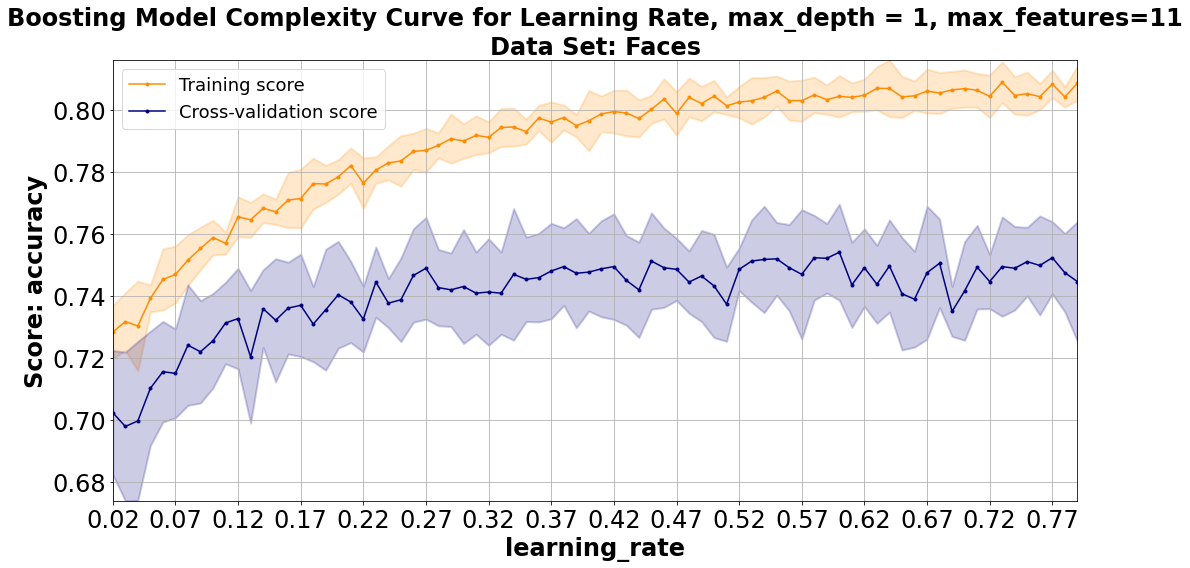

In [11]:
title = "{} Model Complexity Curve for Learning Rate, max_depth = 1, max_features=11\nData Set: {}".format(ALGO, DATASET)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(default_base_estimator), X_train, y_train, "learning_rate", learning_rate, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate", learning_rate, title=title, scoring="accuracy", tick_spacing=5)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of 240 | elapsed:    2.5s remaining:   35.1s
[Parallel(n_jobs=-1)]: Done  41 out of 240 | elapsed:    5.4s remaining:   26.2s
[Parallel(n_jobs=-1)]: Done  66 out of 240 | elapsed:    8.5s remaining:   22.3s
[Parallel(n_jobs=-1)]: Done  91 out of 240 | elapsed:   11.5s remaining:   18.9s
[Parallel(n_jobs=-1)]: Done 116 out of 240 | elapsed:   14.5s remaining:   15.5s
[Parallel(n_jobs=-1)]: Done 141 out of 240 | elapsed:   17.5s remaining:   12.3s
[Parallel(n_jobs=-1)]: Done 166 out of 240 | elapsed:   20.6s remaining:    9.2s
[Parallel(n_jobs=-1)]: Done 191 out of 240 | elapsed:   23.7s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 216 out of 240 | elapsed:   26.7s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   29.8s finished


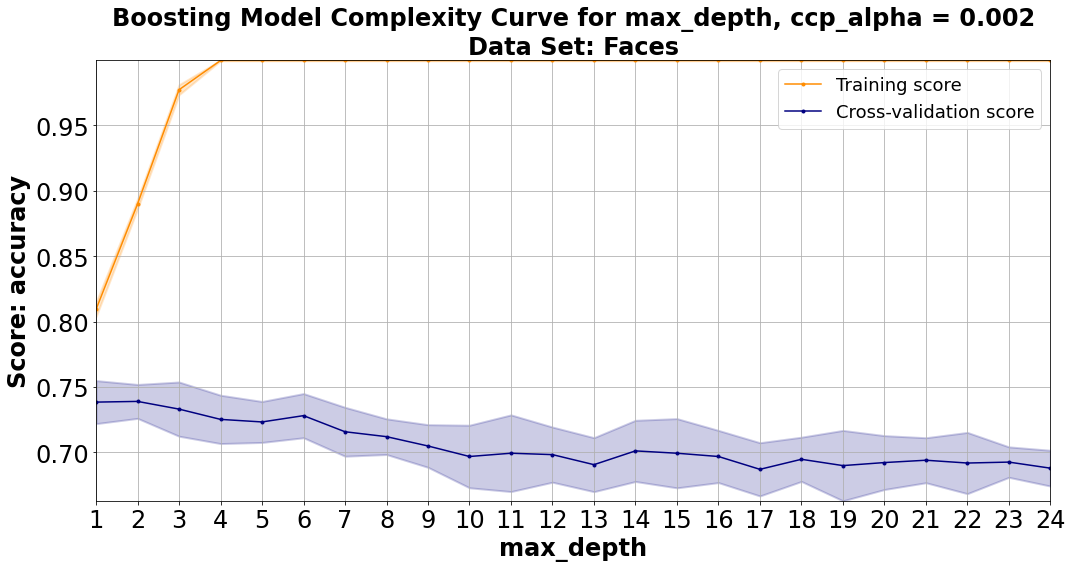

In [12]:
title = "{} Model Complexity Curve for max_depth, ccp_alpha = 0.002\nData Set: {}".format(ALGO, DATASET)
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(default_base_estimator), X_train, y_train, "base_estimator", max_depth_classifiers, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "max_depth", max_depth_labels, title=title, scoring="accuracy", tick_spacing=1)

In [13]:
train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(default_base_estimator), X_train, y_train, "base_estimator", post_pruning_classifiers, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 out of 1000 | elapsed:    6.3s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done 193 out of 1000 | elapsed:   12.2s remaining:   51.2s
[Parallel(n_jobs=-1)]: Done 294 out of 1000 | elapsed:   18.1s remaining:   43.6s
[Parallel(n_jobs=-1)]: Done 395 out of 1000 | elapsed:   24.2s remaining:   37.0s
[Parallel(n_jobs=-1)]: Done 496 out of 1000 | elapsed:   30.3s remaining:   30.8s
[Parallel(n_jobs=-1)]: Done 597 out of 1000 | elapsed:   36.3s remaining:   24.5s
[Parallel(n_jobs=-1)]: Done 698 out of 1000 | elapsed:   42.3s remaining:   18.3s
[Parallel(n_jobs=-1)]: Done 799 out of 1000 | elapsed:   48.3s remaining:   12.2s
[Parallel(n_jobs=-1)]: Done 900 out of 1000 | elapsed:   54.2s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:   59.9s finished


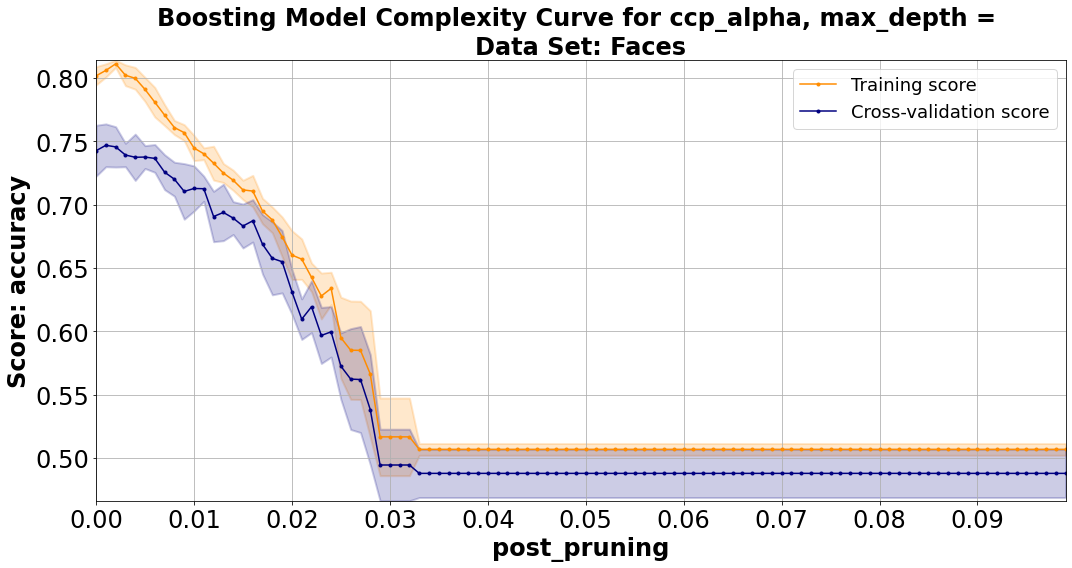

In [14]:
title = "{} Model Complexity Curve for ccp_alpha, max_depth = \nData Set: {}".format(ALGO, DATASET)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "post_pruning", post_pruning_labels, title=title, scoring="accuracy", tick_spacing=10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  41 out of 490 | elapsed:    1.3s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  91 out of 490 | elapsed:    2.9s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done 141 out of 490 | elapsed:    4.4s remaining:   10.9s
[Parallel(n_jobs=-1)]: Done 191 out of 490 | elapsed:    5.9s remaining:    9.3s
[Parallel(n_jobs=-1)]: Done 241 out of 490 | elapsed:    7.5s remaining:    7.7s
[Parallel(n_jobs=-1)]: Done 291 out of 490 | elapsed:    9.0s remaining:    6.1s
[Parallel(n_jobs=-1)]: Done 341 out of 490 | elapsed:   10.5s remaining:    4.6s
[Parallel(n_jobs=-1)]: Done 391 out of 490 | elapsed:   12.0s remaining:    3.0s
[Parallel(n_jobs=-1)]: Done 441 out of 490 | elapsed:   13.6s remaining:    1.5s
[Parallel(n_jobs=-1)]: Done 490 out of 490 | elapsed:   15.1s finished


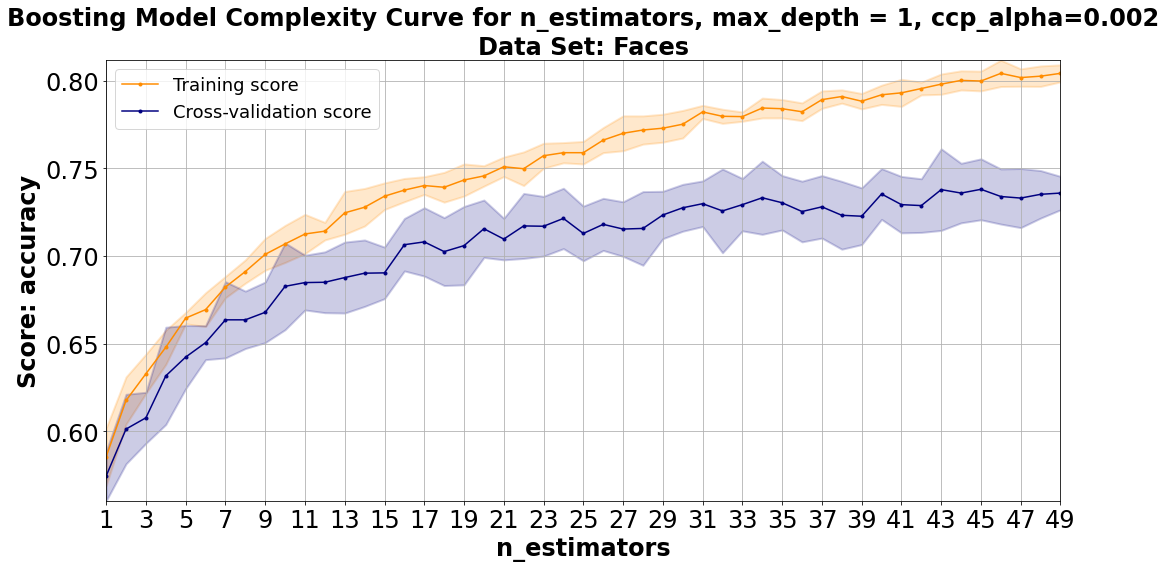

In [15]:
title = "{} Model Complexity Curve for n_estimators, max_depth = 1, ccp_alpha=0.002\nData Set: {}".format(ALGO, DATASET)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(tree.DecisionTreeClassifier(ccp_alpha=0.002, max_depth=1, max_features=max_features)), X_train, y_train, "n_estimators", n_estimators, 'accuracy', cv=TrainingCurves.get_cv(), n_jobs=-1, verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "n_estimators", n_estimators, title=title, scoring="accuracy", tick_spacing=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of 780 | elapsed:    4.7s remaining:   47.5s
[Parallel(n_jobs=-1)]: Done 149 out of 780 | elapsed:    9.6s remaining:   40.8s
[Parallel(n_jobs=-1)]: Done 228 out of 780 | elapsed:   14.2s remaining:   34.5s
[Parallel(n_jobs=-1)]: Done 307 out of 780 | elapsed:   18.9s remaining:   29.1s
[Parallel(n_jobs=-1)]: Done 386 out of 780 | elapsed:   23.5s remaining:   24.0s
[Parallel(n_jobs=-1)]: Done 465 out of 780 | elapsed:   28.2s remaining:   19.1s
[Parallel(n_jobs=-1)]: Done 544 out of 780 | elapsed:   32.9s remaining:   14.3s
[Parallel(n_jobs=-1)]: Done 623 out of 780 | elapsed:   37.6s remaining:    9.5s
[Parallel(n_jobs=-1)]: Done 702 out of 780 | elapsed:   42.3s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done 780 out of 780 | elapsed:   46.6s finished


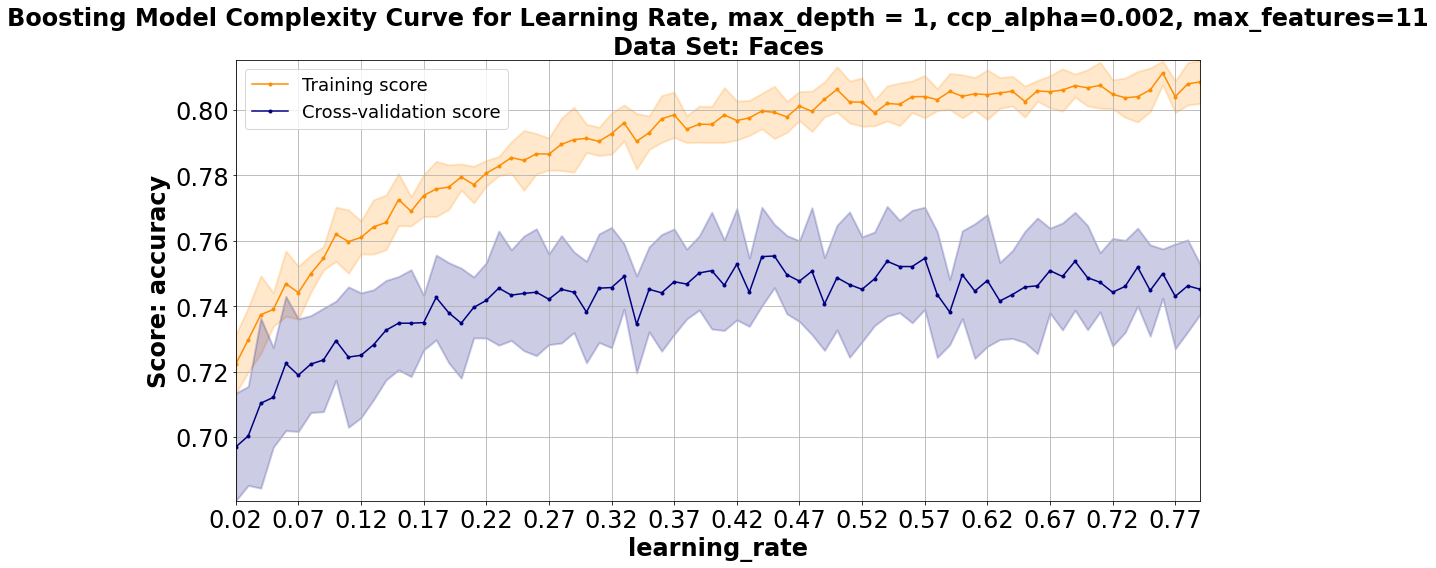

In [16]:
title = "{} Model Complexity Curve for Learning Rate, max_depth = 1, ccp_alpha=0.002, max_features=11\nData Set: {}".format(ALGO, DATASET)

train_scores_mean, train_scores_std, test_scores_mean, test_scores_std = \
TrainingCurves.perform_validation_curve(AdaBoostClassifier(tree.DecisionTreeClassifier(ccp_alpha=0.002, max_depth=1, max_features=max_features)), X_train, y_train, "learning_rate", learning_rate, 'accuracy', cv=TrainingCurves.get_cv(), verbose=10)
TrainingCurves.plot_validation_curve(train_scores_mean, train_scores_std, test_scores_mean, test_scores_std, "learning_rate", learning_rate, title=title, scoring="accuracy", tick_spacing=5)

In [17]:
n_estimators = [i for i in range(1, 20, 2)]
learning_rate = [i for i in np.arange(0.02, .5, 0.02)]
ccp_alpha = np.arange(0.0, 0.04, 0.001)

post_pruning_classifiers = []
post_pruning_labels = []
for i in ccp_alpha:
    for depth in range(1, 6):
        post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=i, max_depth=depth, max_features=max_features))
    post_pruning_labels.append(i)

post_pruning_classifiers = []
post_pruning_labels = []
for depth in range(1, 6):
    post_pruning_classifiers.append(tree.DecisionTreeClassifier(ccp_alpha=0.002, max_depth=depth, max_features=max_features))
post_pruning_labels.append(i)
    
parameters = {'n_estimators': n_estimators, 'learning_rate': learning_rate, 'base_estimator': post_pruning_classifiers}

gs = common_boosting.perform_grid_search(parameters, X_train, y_train, scoring='accuracy', GS_FILE_NAME_PREFIX= GS_FILE_NAME_PREFIX)

gs_results_max_depth = gs

NOT performing Grid Search


Plot saved as:  Figures/Faces_Boosting_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


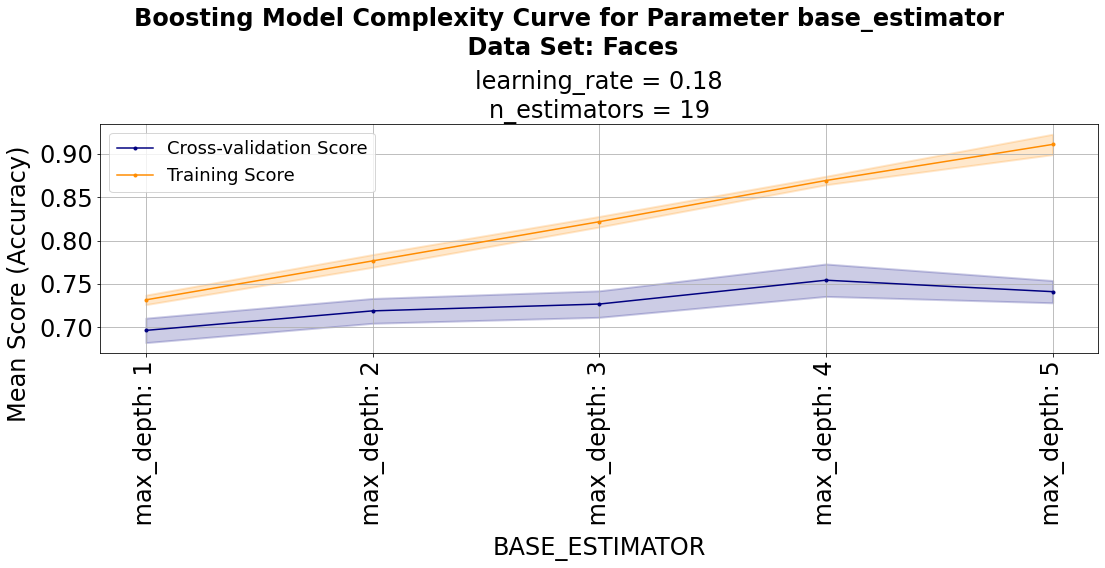

Plot saved as:  Figures/Faces_Boosting_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


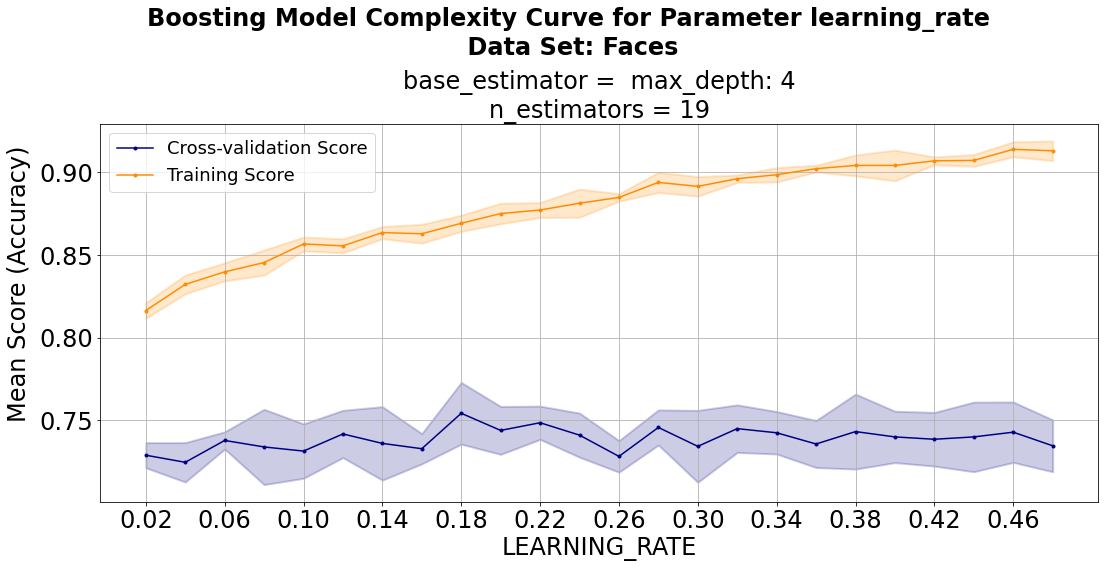

Plot saved as:  Figures/Faces_Boosting_GS_ModelComplexity_base_estimator_learning_rate_n_estimators.png


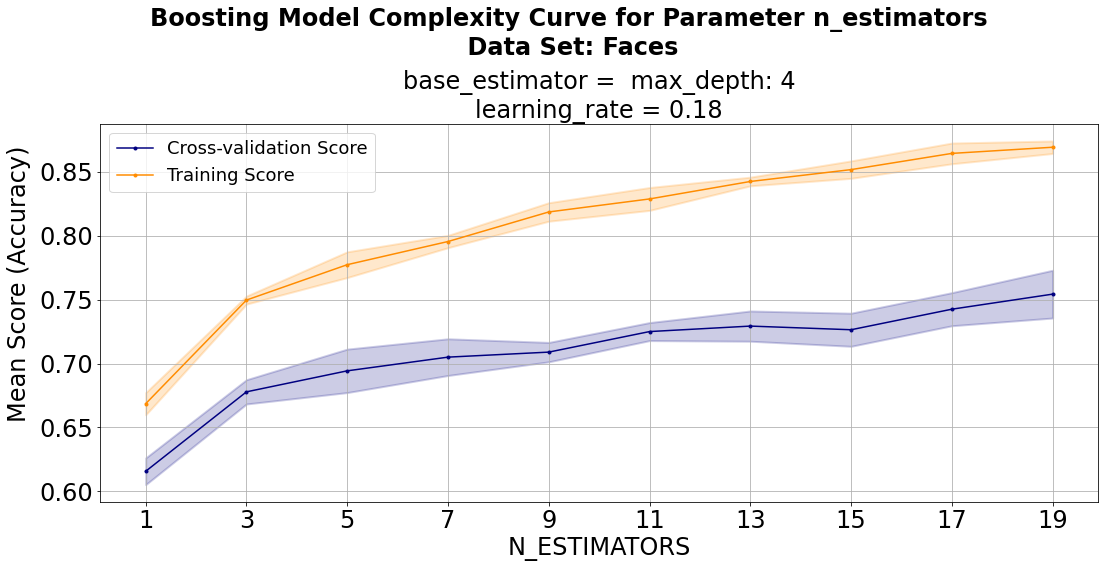

In [18]:
unused_params_values = {}
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results_max_depth, "base_estimator", PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values, tick_spacing=1, dt_param='max_depth')
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results_max_depth, "learning_rate", PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values, tick_spacing=2, dt_param='max_depth')
common_grid_search_analysis.plot_grid_search_model_complexity_1param(gs_results_max_depth, "n_estimators", PLOT_SAVE_LOCATION, ALGO, DATASET, unused_params_value_dict=unused_params_values, tick_spacing=1, dt_param='max_depth')

In [19]:
base_estimator=tree.DecisionTreeClassifier(ccp_alpha=0.002, max_depth=1)
final_params={'base_estimator': base_estimator, 'learning_rate': 0.22, 'n_estimators': 15}

train_sizes, train_scores, test_scores, fit_times, score_times = TrainingCurves.perform_learning_curve(AdaBoostClassifier(**final_params), X_train, y_train, "accuracy")

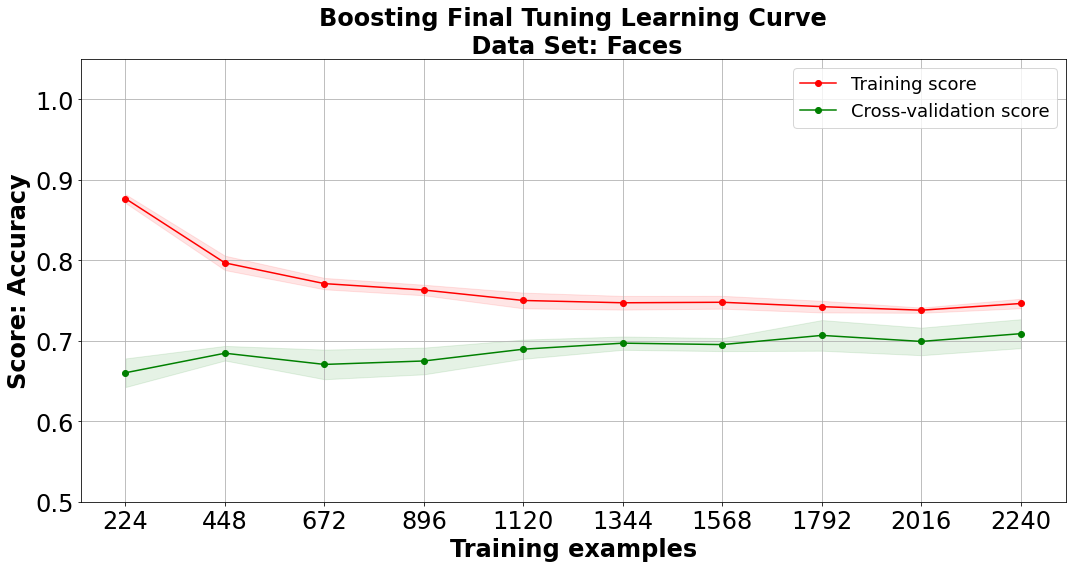

In [20]:
TrainingCurves.plot_learning_curve(train_scores, test_scores, train_sizes, final_title, ylim=ylim)


In [23]:
print("Default Fit Time: {} seconds".format(round(np.mean(default_fit_times, axis=1)[-1], 3)))
print("Default Predict Time {} seconds".format(round(np.mean(default_score_times, axis=1)[-1], 3)))
print()
print("Final Fit Time: {} seconds".format(round(np.mean(fit_times, axis=1)[-1], 3)))
print("Final Predict Time: {} seconds".format(round(np.mean(score_times, axis=1)[-1], 3)))

Default Fit Time: 0.167 seconds
Default Predict Time 0.012 seconds

Final Fit Time: 0.499 seconds
Final Predict Time: 0.005 seconds


In [24]:
clf = AdaBoostClassifier(**final_params)
clf.fit(X_train, y_train)
print("Train Accuracy: {}%".format(round(clf.score(X_train, y_train)*100, 1)))
print("Test Accuracy: {}%".format(round(clf.score(X_test, y_test)*100, 1)))

Train Accuracy: 74.0%
Test Accuracy: 70.3%
